### Feature Engineering and Feature Selection

In [3]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
order = pd.read_csv('olist_order_items_dataset.csv') #orders order id PK

In [17]:
order.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [18]:
d_set = order
d_set.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [19]:
d_set = d_set.sort_values('shipping_limit_date')
d_set.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
101394,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


In [20]:
d_set = d_set[['shipping_limit_date', 'price', 'freight_value']]
d_set.head(2)

,shipping_limit_date,price,freight_value
101394,2016-09-19 00:15:34,59.50,15.56
84389,2016-09-19 23:11:33,44.99,2.83


In [21]:
d_set.dtypes

shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [22]:
d_set['shipping_limit_date'] = pd.to_datetime(d_set['shipping_limit_date'])
d_set.dtypes

shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [23]:
#https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
d_set.set_index('shipping_limit_date', inplace=True)
d_set = d_set.resample("M").sum()

In [25]:
d_set

,price,freight_value
shipping_limit_date,,
2016-09-30,194.47,24.05
2016-10-31,49580.55,7364.52
2016-11-30,0.00,0.00
2016-12-31,10.90,8.72
2017-01-31,80124.74,12073.67
2017-02-28,245982.01,36749.51
2017-03-31,343242.60,53299.79
2017-04-30,308148.32,44697.44
2017-05-31,505655.46,80566.33


> We can observe there are many Outliers, so assuming the months with no sales to be Outliers we remove them

In [28]:
d_set.shape

(44, 2)

In [29]:
#https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
d_set = d_set.drop(d_set[d_set['price'] == 0.00].index, axis= 0)

In [30]:
d_set

,price,freight_value
shipping_limit_date,,
2016-09-30,194.47,24.05
2016-10-31,49580.55,7364.52
2016-12-31,10.90,8.72
2017-01-31,80124.74,12073.67
2017-02-28,245982.01,36749.51
2017-03-31,343242.60,53299.79
2017-04-30,308148.32,44697.44
2017-05-31,505655.46,80566.33
2017-06-30,469001.05,74622.07


> Removing months with too low sum of Monthely prices since they look like outliers

In [ ]:
d_2 = d_2.drop(d_2.tail(3).index)

In [33]:
#Remove months with less than 1000 price, they might be outliers
d_set = d_set[d_set['price'] > 1000]

In [34]:
d_set

,price,freight_value
shipping_limit_date,,
2016-10-31,49580.55,7364.52
2017-01-31,80124.74,12073.67
2017-02-28,245982.01,36749.51
2017-03-31,343242.60,53299.79
2017-04-30,308148.32,44697.44
2017-05-31,505655.46,80566.33
2017-06-30,469001.05,74622.07
2017-07-31,465282.10,79568.07
2017-08-31,560093.34,96150.99


In [40]:
d_set.rename(columns= {'price': 'Total sales'}, inplace= True)
d_set.index.names = ['Monthly Shipping']

In [43]:
d_set.head(2)

,Total sales,freight_value
Monthly Shipping,,
2016-10-31,49580.55,7364.52
2017-01-31,80124.74,12073.67


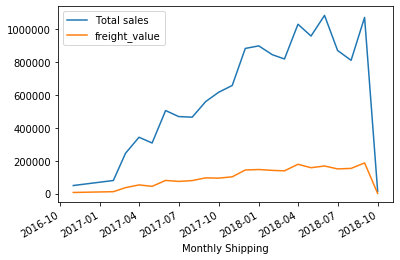

In [41]:
d_set.plot()

In [42]:
# Testing whether the data is Stationary or not
from statsmodels.tsa.stattools import adfuller

In [44]:
test_result= adfuller(d_set['Total sales'])

In [45]:
#https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [46]:
adfuller_test(d_set['Total sales'])

ADF Test Statistic : -2.1829965125890687
p-value : 0.21247451728902061
#Lags Used : 1
Number of Observations Used : 20
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


> Data looks like Stationary, but our test says data is non-stationary based on p-value

### Differencing (Making the data Stationary)

In [53]:
d_set['Seasonal First Difference'] = d_set['Total sales'] - d_set['Total sales'].shift(1)

/Users/manojkashyap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
d_set

,Total sales,freight_value,Seasonal First Difference
Monthly Shipping,,,
2016-10-31,49580.55,7364.52,NaN
2017-01-31,80124.74,12073.67,30544.19
2017-02-28,245982.01,36749.51,165857.27
2017-03-31,343242.60,53299.79,97260.59
2017-04-30,308148.32,44697.44,-35094.28
2017-05-31,505655.46,80566.33,197507.14
2017-06-30,469001.05,74622.07,-36654.41
2017-07-31,465282.10,79568.07,-3718.95
2017-08-31,560093.34,96150.99,94811.24


In [55]:
## Again test dickey fuller test
adfuller_test(d_set['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.475210170584725
p-value : 0.000217947305628503
#Lags Used : 0
Number of Observations Used : 20
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


> p-value reduced significantly, Hence our data is stationary now

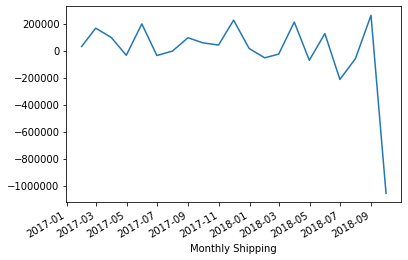

In [56]:
d_set['Seasonal First Difference'].plot()

In [59]:
X = d_set.dropna().drop(['Total sales'], axis= 1)
y = d_set.dropna().drop(['freight_value', 'Seasonal First Difference'], axis= 1)

In [60]:
X.head(2)

,freight_value,Seasonal First Difference
Monthly Shipping,,
2017-01-31,12073.67,30544.19
2017-02-28,36749.51,165857.27


In [61]:
y.head(2)

,Total sales
Monthly Shipping,
2017-01-31,80124.74
2017-02-28,245982.01


In [62]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X = pd.DataFrame(X)

In [64]:
X #Data is into the same scales

,0,1
0,-1.747387,0.122620
1,-1.292556,0.637670
2,-0.987498,0.376567
3,-1.146058,-0.127223
4,-0.484914,0.758141
5,-0.594480,-0.133162
6,-0.503315,-0.007798
7,-0.197654,0.367244
8,-0.226822,0.223141
9,-0.080190,0.162320


In [65]:
#https://www.kaggle.com/antoinekrajnc/simplest-time-series-using-linear-regression
def TimeSeriesTrainTestSplit(x, y, test_size):
    
        test_index = int(len(X)*(1-test_size))
    
        X_train = X.iloc[:test_index]
        y_train = y.iloc[:test_index]
        X_test = X.iloc[test_index:]
        y_test = y.iloc[test_index:]
        return X_train, y_train, X_test, y_test
    
X_train, y_train, X_test, y_test = TimeSeriesTrainTestSplit(X,y, 0.2)

In [66]:
X_train

,0,1
0,-1.747387,0.122620
1,-1.292556,0.637670
2,-0.987498,0.376567
3,-1.146058,-0.127223
4,-0.484914,0.758141
5,-0.594480,-0.133162
6,-0.503315,-0.007798
7,-0.197654,0.367244
8,-0.226822,0.223141
9,-0.080190,0.162320


In [67]:
X_test

,0,1
16,1.132942,0.484546
17,0.806779,-0.806763
18,0.863410,-0.220519
19,1.477417,0.999877
20,-1.941844,-4.019418


## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
from sklearn.model_selection import TimeSeriesSplit
ts_cross_val = TimeSeriesSplit(n_splits=5)

In [70]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(regressor, X_train, y_train, cv = ts_cross_val, scoring= "neg_mean_squared_error")

In [71]:
cv

array([-1.90360408e+09, -2.06600618e+09, -1.61524235e+07, -9.50810892e+08,
       -1.47053876e+09])

In [72]:
y_pred = regressor.predict(X_test)

In [79]:
y_test

,Total sales
Monthly Shipping,
2018-05-31,1084358.55
2018-06-30,870736.84
2018-07-31,811132.08
2018-08-31,1072147.70
2018-09-30,14502.50


In [80]:
y_pred

array([[1005041.87829122],
       [ 909275.2147516 ],
       [ 924098.5214149 ],
       [1110414.04002306],
       [  64010.6319375 ]])

In [97]:
y1 = y_test.reset_index()

In [98]:
y1

,Monthly Shipping,Total sales
0,2018-05-31,1084358.55
1,2018-06-30,870736.84
2,2018-07-31,811132.08
3,2018-08-31,1072147.70
4,2018-09-30,14502.50


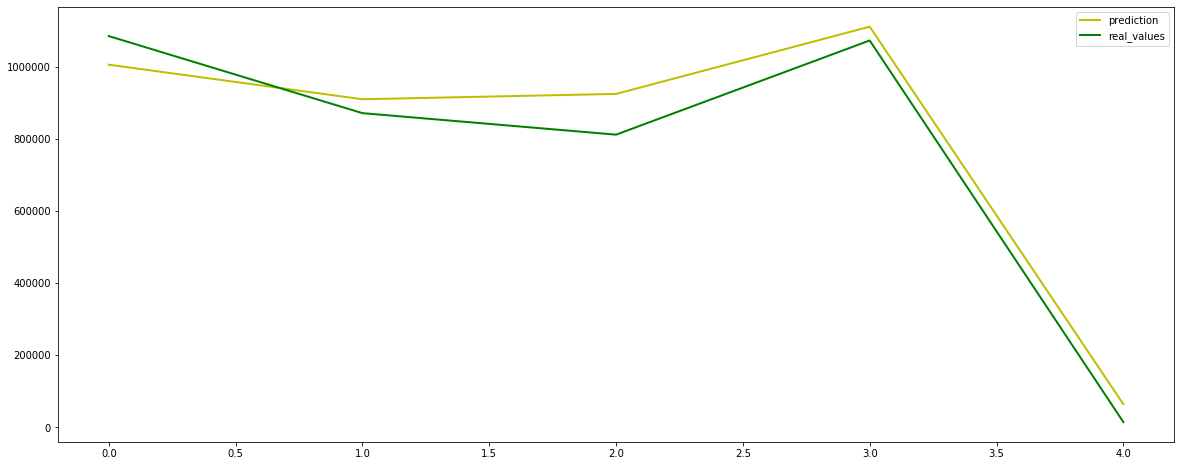

In [102]:
plt.figure(figsize=(20,8))
plt.plot(y_pred, "y", label="prediction", linewidth=2.0)
plt.plot(y_test.values, "g", label="real_values", linewidth=2.0)
plt.legend(loc="best")

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are loss functions, because we want to minimize them.

In [74]:
from sklearn import metrics

In [75]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  63719.19196716293
MSE:  4890625106.419729
RMSE:  69933.00441436596


There is an error of price on an average of 69933 units/currecy, since the amount are in Lakhs, our model might not have performed well, but not bad

In [78]:
# Evaluating the Linear Regression model, R-square
print(regressor.score(X_test, y_test)) 

0.9683548537930171


> We have a very good R-square value, hence almost 96.8% of the variability in Total monthley sales is explained by the predictors

### Ridge(L2) Regression:
#### https://www.geeksforgeeks.org/ml-implementing-l1-and-l2-regularization-using-sklearn/

In [107]:
from sklearn.linear_model import Ridge, Lasso
from statistics import mean 

In [108]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : -1201.440227086318
0.5 : -1377.9712914206627
0.75 : -1584.0227227782225
1.0 : -1816.6617116873244
1.25 : -2073.2497776037135
1.5 : -2351.4089195972747
1.75 : -2648.992274971372
2.0 : -2964.0585895413083


In [109]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, y_test))

0.9523062120170963


### Lasso(L1) Regression:

In [110]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : -1037.5923493033204
0.5 : -1037.5968970711674
0.75 : -1037.6014449281101
1.0 : -1037.6059928741602
1.25 : -1037.610540909313
1.5 : -1037.61508903357
1.75 : -1037.6196372469224
2.0 : -1037.62418554938


In [111]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train, y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_test, y_test)) 

0.9683665054854449


### Comparing and Visualizing the results

In [115]:
print("Linear Regreesion :", regressor.score(X_test, y_test)) 
print("Ridge Regreesion :", lassoModelChosen.score(X_test, y_test)) 
print("Lasso Regression :", lassoModelChosen.score(X_test, y_test)) 

Linear Regreesion : 0.9683548537930171
Ridge Regreesion : 0.9683665054854449
Lasso Regression : 0.9683665054854449


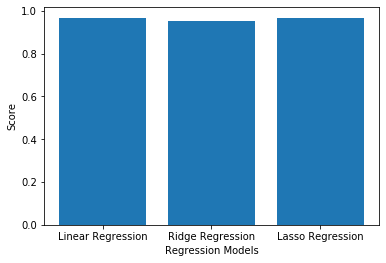

In [116]:
# Plotting the scores 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [regressor.score(X_test, y_test), 
         ridgeModelChosen.score(X_test, y_test), 
         lassoModelChosen.score(X_test, y_test)]

plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 